In [1]:
import pandas as pd
import time
from Vorace import Vorace
from SEP import SEP
from SEP_svm import SEP_svm
from SEP_svm_no import SEP_svm_no
from sklearn import svm

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.preprocessing import LabelEncoder
import numpy as np

import scipy.stats as stats
from scipy.stats import wilcoxon, shapiro
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support, f1_score, precision_score, recall_score

import random
random.seed(42)

import networkx as nx

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

def compareEq(data1,data2):
    n=len(data1)
    if len(data1)>len(data2):
        n=len(data2)
    temp_data1=data1.sample(n=n)
    temp_data2=data2.sample(n=n)
    #print(len(data1), " ", len(data2))
    stat, p = wilcoxon(temp_data1, temp_data2, correction=True)
    return stat, p

# CARICA IL DATASET
prefix=("DF","BF","AF")
suffix={"DF":["SP","WA","SO","CA","CO","SU","BR","HS","TP","MA","FA","SW"], \
        "BF":["HA","CL","TU","JA","FR","EL","BR"],	 \
        "AF":["MN","BA","JA","CA","BR","HR"]}

listIndex=("1_1","2_1","3_1","4_1","5_1","6_1","7_1","8_1","8_2")

mapping={}
list=('DFO_SP','DFO_WA','DFO_SO','DFO_CA','DFO_CO','DFO_SU','DFO_BR','DFO_HS','DFO_TP','DFO_MA','DFO_FA','DFO_SW','BFO_HA','BFO_CL','BFO_TU','BFO_JA','BFO_FR','BFO_EL','BFO_BR','AFO_MN','AFO_BA','AFO_JA','AFO_CA','AFO_BR','AFO_HR')
#len(list)

listNine=[]

for p in prefix:
    for s in suffix[p]:
        string=p+"O_"+s
        mapping[string]=list.index(string)
        item=[]
        item.append(string)
        for i in listIndex:
            item.append(p+"U_"+s+"_"+i)

        listNine.append(item)
        #print(string, end="")

#print(listNine)
new_listNine=['pref','q_1_1', 'q_2_1', 'q_3_1', 'q_4_1', 'q_5_1', 'q_6_1', 'q_7_1', 'q_8_1', 'q_8_2']
new_listNine=['pref','everyone','first_person','middle_person','last_person','cutter','univers.','likelihood','delay_min','delay_sec']
new_listNine=['Judgement',"Global Welfare", "First Person Welfare", "Middle Person Welfare", "Last Person Welfare", "Line Cutter Welfare", "Universalization", "Likelihood",'delay_min','delay_sec']

train_df=pd.read_csv("data/pref_eval_test.csv", sep=";")
train_df=train_df[train_df.Q276=="I am paying attention"]

new_train=pd.DataFrame()

for l in listNine:
    #crea dizionario per la mappatura con i nuovi campi tutti con lo stesso nome
    #l=[list[j]]+listNine[j]
    dictTemp={l[i]: new_listNine[i] for i in range(0, len(new_listNine))}
    l.append('Duration')
    #estrae domande per scenario
    temp=train_df[train_df.columns.intersection(l)]
    #print(temp)
    #cambia nome
    temp=temp.rename(columns=dictTemp)
    temp=temp.dropna()
    temp["type"]=listNine.index(l)
    #print(len(listNine))
    #exit()
    if listNine.index(l)<12:
        temp["family"]=0
        temp.Duration /= 12
    elif listNine.index(l)<19:
        temp["family"]=1
        temp.Duration /= 7
    else:
        temp["family"]=2
        temp.Duration /= 6
    #print(temp)
    #temp["value"]=np.nan
    new_train=pd.concat([new_train,temp], axis=0, ignore_index=True)

print(f"DELI TIME: {np.mean(new_train.Duration[new_train.family==0])}")
print(f"BATH TIME: {np.mean(new_train.Duration[new_train.family==1])}")
print(f"AIR TIME: {np.mean(new_train.Duration[new_train.family==2])}")


Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


DELI TIME: 78.22689768976898
BATH TIME: 91.3168831168831
AIR TIME: 102.3038194444444


In [2]:
from sklearn import linear_model

y = new_train['Judgement']
#x = new_train[["Global Welfare", "First Person Welfare", "Middle Person Welfare", "Last Person Welfare", "Line Cutter Welfare", "Universalization", "Likelihood",'delay_min','delay_sec']]
x = new_train[["Global Welfare", "First Person Welfare", "Middle Person Welfare", "Last Person Welfare", "Line Cutter Welfare", "Universalization", "Likelihood",'type','family']]
y = y-1

In [3]:
sepsvm = SEP_svm()
sepsvm.fit(x,y)
y_pred = sepsvm.predict(x)
accuracy = accuracy_score(y, y_pred)
print(accuracy)

0.8017982799061767


In [3]:
x

,Global Welfare,First Person Welfare,Middle Person Welfare,Last Person Welfare,Line Cutter Welfare,Universalization,Likelihood,type,family
0,38.0,36.0,25.0,27.0,34.0,33.0,85.0,0,0
1,-32.0,-1.0,-9.0,-32.0,30.0,-44.0,72.0,0,0
2,-27.0,-12.0,-23.0,-24.0,18.0,-16.0,31.0,0,0
3,1.0,-2.0,-3.0,-2.0,28.0,21.0,90.0,0,0
4,-15.0,-10.0,-13.0,-11.0,11.0,-17.0,10.0,0,0
...,...,...,...,...,...,...,...,...,...
2553,-35.0,-21.0,-26.0,-37.0,50.0,-41.0,58.0,24,2
2554,-14.0,-8.0,-11.0,-4.0,5.0,-28.0,10.0,24,2
2555,-24.0,31.0,-19.0,-22.0,22.0,-40.0,73.0,24,2
2556,27.0,37.0,40.0,23.0,32.0,22.0,81.0,24,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12f8c0400>,
      dtype=object)

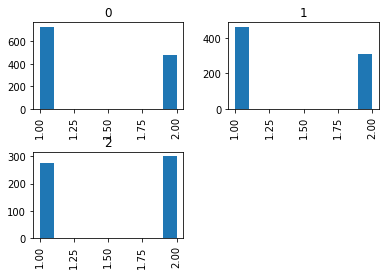

In [43]:
new_train.hist(column="Judgement", by="family")

In [19]:
scores = cross_val_score(regr, x, y, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

-0.08 accuracy with a standard deviation of 0.54


In [7]:


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test

In [16]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
scores = cross_val_score(clf, x, y, cv=10, scoring='f1_macro')

#Train the model using the training sets y_pred=clf.predict(X_test)
#clf.fit(X_train,y_train)

#y_pred=clf.predict(X_test)



In [17]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.56 accuracy with a standard deviation of 0.14


In [10]:
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [21]:
# fit model no training data
model = XGBClassifier()
scores = cross_val_score(model, x, y, cv=10, scoring='accuracy')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.52 accuracy with a standard deviation of 0.21


In [22]:

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [23]:

# evaluate predictions
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.99%


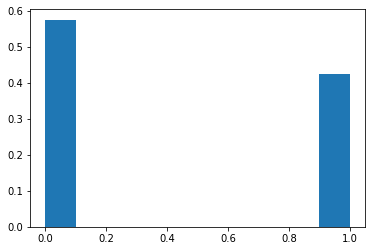

In [15]:
plt.hist(y, weights=np.ones(len(y)) / len(y))
plt.show()

In [3]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support

kf = KFold(n_splits=5,random_state=42, shuffle=True)

score_vorace=[]
score_xgb=[]
score_rand=[]
score_sep=[]
score_sep_table=[]
score_sep_no=[]
score_svm=[]
#x = np.array(x)
#y = np.array(y)
i = 0
for train, test in kf.split(x,y):
    i = i+1
    print(f"DOING: {i}th iteration")
    clf=RandomForestClassifier()
    curr_time = round(time.time()*1000)
    clf.fit(x.iloc[train],y[train])
    curr_time = round(time.time()*1000) - curr_time
    y_pred=clf.predict(x.iloc[test])
    score_rand.append([accuracy_score(y[test], y_pred),f1_score(y[test], y_pred),precision_score(y[test], y_pred),recall_score(y[test], y_pred), curr_time])
    
    clf = XGBClassifier()
    curr_time = round(time.time()*1000)
    clf.fit(x.iloc[train],y[train])
    curr_time = round(time.time()*1000) - curr_time
    y_pred=clf.predict(x.iloc[test])
    score_xgb.append([accuracy_score(y[test], y_pred),f1_score(y[test], y_pred),precision_score(y[test], y_pred),recall_score(y[test], y_pred),curr_time])
    
    #Create a svm Classifier
    clf = svm.SVC(kernel='linear') # Linear Kernel
    #Train the model using the training sets
    curr_time = round(time.time()*1000)
    clf.fit(x.iloc[train],y[train])
    curr_time = round(time.time()*1000) - curr_time
    #Predict the response for test dataset
    y_pred = clf.predict(x.iloc[test])
    score_svm.append([accuracy_score(y[test], y_pred),f1_score(y[test], y_pred),precision_score(y[test], y_pred),recall_score(y[test], y_pred),curr_time])

    sep = SEP()
    curr_time = round(time.time()*1000)
    sep.fit(x.iloc[train],y[train])
    curr_time = round(time.time()*1000) - curr_time
    y_pred=sep.predict(x.iloc[test])
    #print(f"Random sep: {sep.random}/{len(x.iloc[test])} ")
    score_sep_table.append([accuracy_score(y[test], y_pred),f1_score(y[test], y_pred),precision_score(y[test], y_pred),recall_score(y[test], y_pred),curr_time])
    
    sep = SEP_svm()
    curr_time = round(time.time()*1000)
    sep.fit(x.iloc[train],y[train])
    curr_time = round(time.time()*1000) - curr_time
    y_pred=sep.predict(x.iloc[test])
    print(f"Random sep: {sep.random}/{len(x.iloc[test])} ")
    score_sep.append([accuracy_score(y[test], y_pred),f1_score(y[test], y_pred),precision_score(y[test], y_pred),recall_score(y[test], y_pred),curr_time])
    
    '''sep_no = SEP_svm_no()
    sep_no.fit(x.iloc[train],y[train])
    y_pred=sep_no.predict(x.iloc[test])
    #print(f"Random sep: {sep_no.random}/{len(x.iloc[test])} ")
    score_sep_no.append([accuracy_score(y[test], y_pred),f1_score(y[test], y_pred),precision_score(y[test], y_pred),recall_score(y[test], y_pred),curr_time])
    '''

    y_oneHot=to_categorical(y[train],num_classes=2)
    vorace = Vorace(n_models=100, profile_type=0, nInput=9, nClasses=2, batch_size=32)
    curr_time = round(time.time()*1000)
    vorace.fit(x.iloc[train], y[train], y_oneHot, bagging=False)
    curr_time = round(time.time()*1000) - curr_time
    y_pred,_ = vorace.predict(voting="Plurality",x=x.iloc[test], nClasses=2, argMax=True, tiebreak="best")
    y_oneHot=to_categorical(y[test],num_classes=3)
    score_vorace.append([accuracy_score(y[test], y_pred),f1_score(y[test], y_pred),precision_score(y[test], y_pred),recall_score(y[test], y_pred),curr_time])
    print(f"DONE: {i}th iteration")


    

DOING: 1th iteration


/Users/aloreggia/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Random sep: 0/512 
DONE: 1th iteration
DOING: 2th iteration


/Users/aloreggia/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Random sep: 0/512 
DONE: 2th iteration
DOING: 3th iteration


/Users/aloreggia/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Random sep: 0/512 
DONE: 3th iteration
DOING: 4th iteration


/Users/aloreggia/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Random sep: 0/511 
DONE: 4th iteration
DOING: 5th iteration


/Users/aloreggia/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Random sep: 0/511 
DONE: 5th iteration


In [4]:
def print_results(list_results):
    s = "%0.4f (%0.4f) & " % (np.mean(np.array(list_results)[:,0]), np.std(np.array(list_results)[:,0]))
    s = s + "%0.4f (%0.4f) & " % (np.mean(np.array(list_results)[:,1]), np.std(np.array(list_results)[:,1]))
    s = s + "%0.4f (%0.4f) & " % (np.mean(np.array(list_results)[:,2]), np.std(np.array(list_results)[:,2]))
    s = s + "%0.4f (%0.4f) & " % (np.mean(np.array(list_results)[:,3]), np.std(np.array(list_results)[:,3]))
    s = s + "%0.0f (%0.0f) \\\\ " % (np.mean(np.array(list_results)[:,4]), np.std(np.array(list_results)[:,4]))
    return s

In [5]:
print("RandomForest &" + print_results(score_rand))
print("XGBoost &" + print_results(score_xgb))
print("Vorace &" + print_results(score_vorace)) 
print("SEP Table &" + print_results(score_sep_table)) 
print("SEP SVM &" + print_results(score_sep)) 
#print("SEP NO &" + print_results(score_sep_no))
print("SVM &" + print_results(score_svm)) 
score_vorace


RandomForest &0.7651 (0.0069) & 0.7119 (0.0190) & 0.7402 (0.0121) & 0.6859 (0.0276) & 303 (24) \\ 
XGBoost &0.7870 (0.0227) & 0.7307 (0.0417) & 0.7822 (0.0325) & 0.6868 (0.0556) & 109 (4) \\ 
Vorace &0.7166 (0.0091) & 0.6620 (0.0178) & 0.6692 (0.0212) & 0.6550 (0.0152) & 181955 (10173) \\ 
SEP Table &0.7870 (0.0261) & 0.7329 (0.0367) & 0.7817 (0.0354) & 0.6906 (0.0438) & 22 (1) \\ 
SEP SVM &0.7834 (0.0248) & 0.7224 (0.0340) & 0.7926 (0.0458) & 0.6654 (0.0424) & 259 (17) \\ 
SVM &0.7115 (0.0192) & 0.6493 (0.0203) & 0.6704 (0.0103) & 0.6298 (0.0299) & 6157 (454) \\ 


[[0.71875, 0.6470588235294118, 0.6502463054187192, 0.6439024390243903, 189581],
 [0.720703125,
  0.6911447084233261,
  0.7048458149779736,
  0.6779661016949152,
  190748],
 [0.72265625,
  0.6586538461538461,
  0.6715686274509803,
  0.6462264150943396,
  189657],
 [0.6986301369863014,
  0.641860465116279,
  0.6448598130841121,
  0.6388888888888888,
  173880],
 [0.7221135029354208,
  0.6712962962962963,
  0.6744186046511628,
  0.6682027649769585,
  165910]]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)


RandomForest: 0.7701 accuracy with a standard deviation of 0.0262
XGBoost: 0.7447 accuracy with a standard deviation of 0.0174
Vorace: 0.7095 accuracy with a standard deviation of 0.0290
SEP Table: 0.7850 accuracy with a standard deviation of 0.0278
SEP SVM: 0.7862 accuracy with a standard deviation of 0.0304
SEP NO: 0.7158 accuracy with a standard deviation of 0.0224
SVM: 0.7142 accuracy with a standard deviation of 0.0233

In [8]:
sepnet = SEP_svm()
sepnet.fit(X_train,y_train)
y_pred = sepnet.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
accuracy = f1_score(y_test, y_pred)
print(accuracy)
accuracy = precision_score(y_test, y_pred)
print(accuracy)
accuracy = recall_score(y_test, y_pred)
print(accuracy)

0.8359375
0.7666666666666667
0.8313253012048193
0.711340206185567


In [9]:
clf = XGBClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
accuracy = f1_score(y_test, y_pred)
print(accuracy)
accuracy = precision_score(y_test, y_pred)
print(accuracy)
accuracy = recall_score(y_test, y_pred)
print(accuracy)

0.8046875
0.7282608695652173
0.7701149425287356
0.6907216494845361


In [47]:
clf.predict(np.array(x.loc[0]).reshape((1,-1)))

array([0.])

In [5]:
f_test = lambda x: 1

In [12]:
np.unique(y)[0]

0.0

In [39]:
X_test

,Global Welfare,First Person Welfare,Middle Person Welfare,Last Person Welfare,Line Cutter Welfare,Universalization,Likelihood,type,family
1921,-10.0,-27.0,-8.0,-14.0,-9.0,6.0,57.0,18,1
1344,-10.0,-10.0,-10.0,-10.0,0.0,-10.0,65.0,13,1
1220,-33.0,-15.0,-19.0,-31.0,1.0,-21.0,63.0,12,1
1854,22.0,15.0,21.0,33.0,14.0,27.0,76.0,17,1
1374,-20.0,-17.0,-22.0,-19.0,0.0,-19.0,53.0,13,1
...,...,...,...,...,...,...,...,...,...
1716,27.0,35.0,50.0,41.0,38.0,35.0,100.0,16,1
1053,29.0,31.0,35.0,32.0,26.0,34.0,98.0,10,0
1630,19.0,20.0,32.0,18.0,31.0,21.0,82.0,15,1
174,-19.0,-7.0,-18.0,-28.0,-9.0,-13.0,57.0,1,0


In [7]:
new_train.groupby(['family','Judgement'])['Global Welfare'].count()

family  Judgement
0       1.0          733
        2.0          479
1       1.0          463
        2.0          307
2       1.0          276
        2.0          300
Name: Global Welfare, dtype: int64

In [6]:
new_train.groupby(['family','type','Judgement','Global Welfare'])['Global Welfare'].count()

family  type  Judgement  Global Welfare
0       0     1.0        -39.0             1
                         -32.0             1
                         -27.0             1
                         -26.0             1
                         -22.0             1
                                          ..
2       24    2.0         22.0             1
                          26.0             1
                          30.0             1
                          32.0             1
                          40.0             1
Name: Global Welfare, Length: 1533, dtype: int64

In [20]:
score_rand

[[0.81640625, 0.7751196172248803, 0.7941176470588235, 0.7570093457943925],
 [0.76171875, 0.6666666666666667, 0.7176470588235294, 0.6224489795918368],
 [0.73046875, 0.7160493827160493, 0.71900826446281, 0.7131147540983607],
 [0.78125, 0.7454545454545455, 0.7735849056603774, 0.7192982456140351],
 [0.76171875, 0.708133971291866, 0.7326732673267327, 0.6851851851851852],
 [0.734375, 0.6344086021505376, 0.7195121951219512, 0.5673076923076923],
 [0.79296875, 0.7439613526570049, 0.8105263157894737, 0.6875],
 [0.76171875, 0.6995073891625616, 0.7244897959183674, 0.6761904761904762],
 [0.7686274509803922,
  0.694300518134715,
  0.7127659574468085,
  0.6767676767676768],
 [0.7725490196078432,
  0.7410714285714285,
  0.7757009345794392,
  0.7094017094017094]]

In [21]:
score_xgb

[[0.7578125, 0.69, 0.7419354838709677, 0.6448598130841121],
 [0.7265625, 0.6354166666666666, 0.648936170212766, 0.6224489795918368],
 [0.71484375, 0.7044534412955465, 0.696, 0.7131147540983607],
 [0.76953125, 0.7377777777777778, 0.7477477477477478, 0.7280701754385965],
 [0.73046875, 0.6790697674418604, 0.6822429906542056, 0.6759259259259259],
 [0.73046875, 0.6145251396648044, 0.7333333333333333, 0.5288461538461539],
 [0.765625, 0.7247706422018348, 0.7452830188679245, 0.7053571428571429],
 [0.75, 0.6831683168316831, 0.711340206185567, 0.6571428571428571],
 [0.7450980392156863, 0.6733668341708543, 0.67, 0.6767676767676768],
 [0.7568627450980392,
  0.7256637168141592,
  0.7522935779816514,
  0.7008547008547008]]